In [25]:
from utils import iata_to_airport, create_source_list, create_dest_list, create_airports, create_routes, Graph
from collections import defaultdict
import geopandas as gpd
from shapely.geometry import LineString
import cartopy.crs as ccrs
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import time
import networkx as nx

In [8]:
# parsing functions for data, to turn into a graph
routes_infile = 'data/routes.dat'
airports_infile = 'data/airports.dat'

# calculate the graph at the start of the flask app's life, so each request doesn't recalculate it.
routes = create_routes(routes_infile)
airports = create_airports(airports_infile)

source_list = create_source_list(routes)
dest_list = create_dest_list(routes)

graph = Graph(source_list, dest_list, routes, airports)
graph.create_adjacency_list()

print('done')

done


In [30]:
lats_longs = defaultdict(list)
edges = []
pos = {}

for route in routes:
    source_airport = iata_to_airport(route.source, airports)
    dest_airport = iata_to_airport(route.dest, airports)
    if source_airport and dest_airport:
        pos[route.source] = (source_airport.long, source_airport.lat)
        pos[route.dest] = (dest_airport.long, dest_airport.lat)
        lats_longs["source_lats"].append(source_airport.lat)
        lats_longs["source_longs"].append(source_airport.long)
        lats_longs["dest_lats"].append(dest_airport.lat)
        lats_longs["dest_longs"].append(dest_airport.long)
        edges.append([route.source, route.dest])
        

In [32]:

g = nx.from_edgelist(edges)
sg = [g.subgraph(c).copy() for c in nx.connected_components(g)]


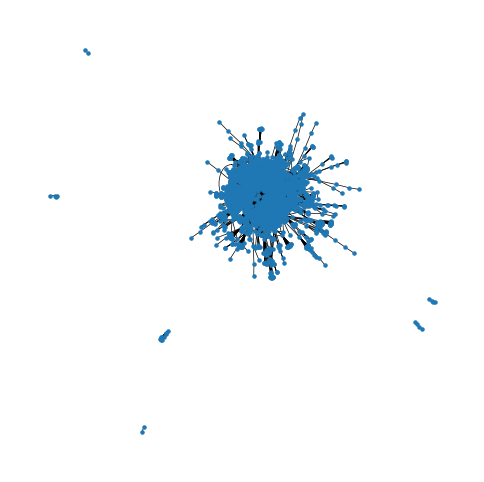

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(g, ax=ax, with_labels=False,
                 node_size=5, width=.5)
ax.set_axis_off()

/Users/rohanbafna/.pyenv/versions/3.9.7/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1696: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  result = super().scatter(*args, **kwargs)


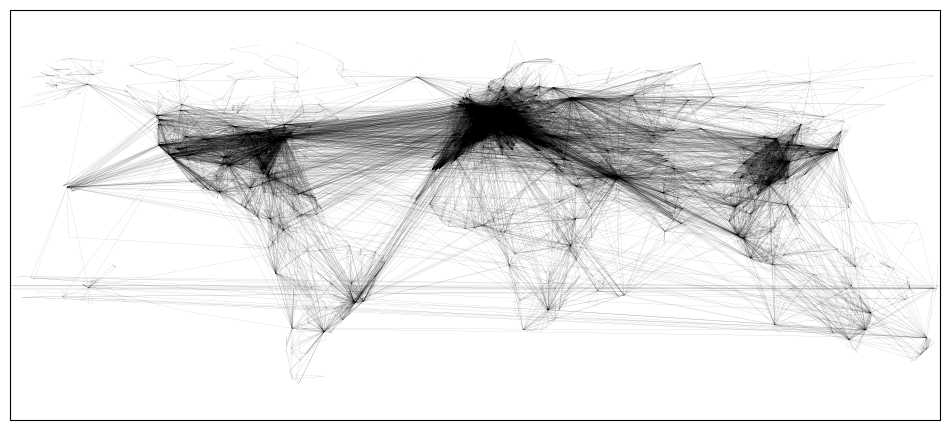

In [40]:
# Map projection
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(
    1, 1, figsize=(12, 8),
    subplot_kw=dict(projection=crs))
# ax.coastlines()
# Extent of continental US.
# ax.set_extent([-128, -62, 20, 50])
nx.draw_networkx(g, ax=ax,
                 # font_size=16,
                 alpha=.5,
                 width=.075,
                 pos=pos,
                 cmap=plt.cm.autumn,
                 with_labels=False,
                node_size=0)


In [7]:
df = pd.DataFrame.from_dict(lats_longs)

geometry = [LineString([[df.iloc[i]['source_longs'], df.iloc[i]['source_lats']], [df.iloc[i]['dest_longs'], df.iloc[i]['dest_lats']]]) for i in range(df.shape[0])]
routes_df = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

fig = plt.figure(facecolor='black')
ax = plt.axes(projection=ccrs.Robinson())
fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('black')

routes_df.plot(ax=ax, transform=ccrs.Geodetic(), color='white', linewidth=0.1, alpha=0.1)

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
ax.set_ylim(-7000000, 8800000)

plt.show()

NameError: name 'df' is not defined

In [87]:
lats_longs = defaultdict(list)

for route in routes[:1]:
    source_airport = iata_to_airport(route.source, airports)
    dest_airport = iata_to_airport(route.dest, airports)
    if source_airport and dest_airport:
        lats_longs["source_lats"].append(source_airport.lat)
        lats_longs["source_longs"].append(source_airport.long)
        lats_longs["dest_lats"].append(dest_airport.lat)
        lats_longs["dest_longs"].append(dest_airport.long)
 


GeodError: inv_intermediate: npts and del_s are mutually exclusive, only one of them must be != 0.

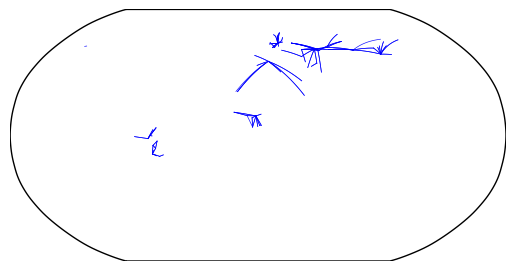

In [71]:
# def draw_map(source_long, source_lat, dest_long, dest_lat, airports_color='b', routes_color='b'):
#     # m.drawcountries()
#     m.drawcoastlines(linewidth=0.7)
#     # m.drawmapboundary(fill_color=(233 / 255, 246 / 255, 255 / 255, 1))
#     # m.fillcontinents(color=(197 / 255, 229 / 255, 255 / 255, 1), lake_color=(233 / 255, 246 / 255, 255 / 255, 1))

#     x, y = m(dest_long, dest_lat)
#     # m.plot(x, y, airports_color + 'o', markersize=2)

#     m.drawgreatcircle(source_long, source_lat, dest_long, dest_lat, linewidth=0.4, color=routes_color, alpha=0.8)

#     source_long, source_lat = m(source_long, source_lat)
#     # m.plot(source_long, source_lat, marker='D', color='r', markersize=2)

#     plt.draw()
    
m = Basemap(projection='robin', lon_0=0, lat_0=0)
    
for i in range(0, len(lats_longs["source_longs"])):
    x, y = m(lats_longs["dest_longs"][i], lats_longs["dest_lats"][i])
    # draw_map(lats_longs["source_longs"][i], lats_longs["source_lats"][i], lats_longs["dest_longs"][i], lats_longs["dest_lats"][i])
    m.drawgreatcircle(lats_longs["source_longs"][i], lats_longs["source_lats"][i], lats_longs["dest_longs"][i], lats_longs["dest_lats"][i], linewidth=0.5, color='b', alpha=0.9)

    source_long, source_lat = m(lats_longs["source_longs"][i], lats_longs["source_lats"][i])

In [88]:
df = pd.DataFrame.from_dict(lats_longs)
geometry = [LineString([[df.iloc[i]['source_longs'], df.iloc[i]['source_lats']], [df.iloc[i]['dest_longs'], df.iloc[i]['dest_lats']]]) for i in range(df.shape[0])]


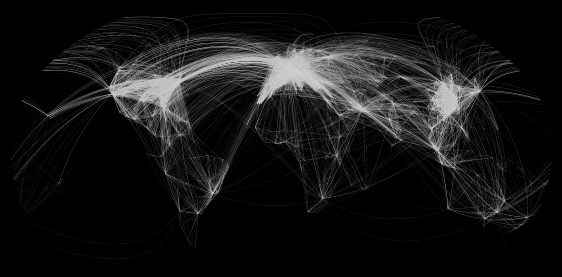

In [107]:
fig = plt.figure(facecolor='black')
ax = plt.axes(projection=ccrs.Robinson())
fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('black')
ax.set_aspect('equal')

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
ax.set_ylim(-7000000, 8800000)

# plt.show()


routes_df = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
routes_df.plot(ax=ax, transform=ccrs.Geodetic(), color='white', linewidth=0.1, alpha=.1)
    
plt.show()

In [16]:
plt.show()

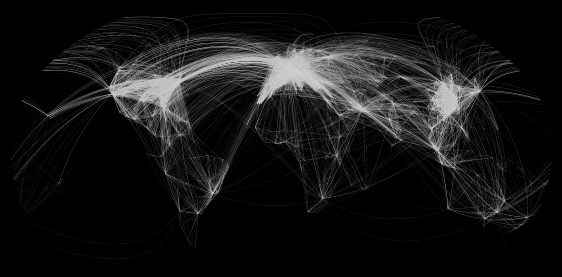

In [8]:
## original visualizer

lats_longs = defaultdict(list)


for route in routes:
    source_airport = iata_to_airport(route.source, airports)
    dest_airport = iata_to_airport(route.dest, airports)
    if source_airport and dest_airport:
        lats_longs["source_lats"].append(source_airport.lat)
        lats_longs["source_longs"].append(source_airport.long)
        lats_longs["dest_lats"].append(dest_airport.lat)
        lats_longs["dest_longs"].append(dest_airport.long)
        
df = pd.DataFrame.from_dict(lats_longs)
        
geometry = [LineString([[df.iloc[i]['source_longs'], df.iloc[i]['source_lats']], [df.iloc[i]['dest_longs'], df.iloc[i]['dest_lats']]]) for i in range(df.shape[0])]
routes_df = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

fig = plt.figure(facecolor='black')
ax = plt.axes(projection=ccrs.Robinson())
fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('black')

routes_df.plot(ax=ax, transform=ccrs.Geodetic(), color='white', linewidth=0.1, alpha=0.1)

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')
ax.set_ylim(-7000000, 8800000)

plt.show()